# IPCV LAB 2
# NAME: AYUSHI SINGH
# SAP ID: 60009220202

In [ ]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images = train_images.reshape(60000, 28, 28, 1)

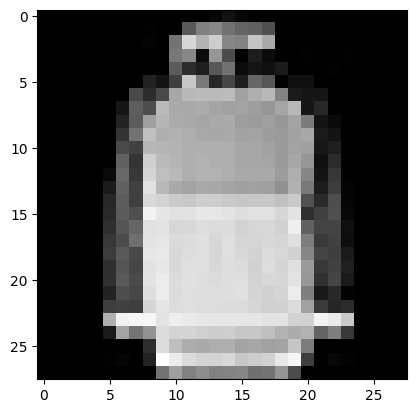

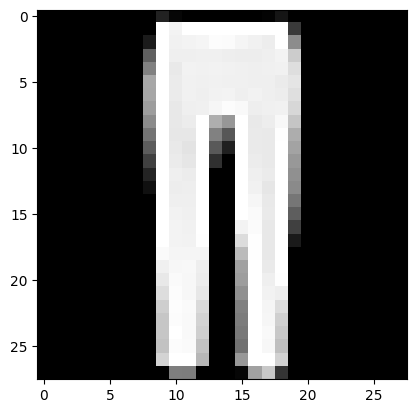

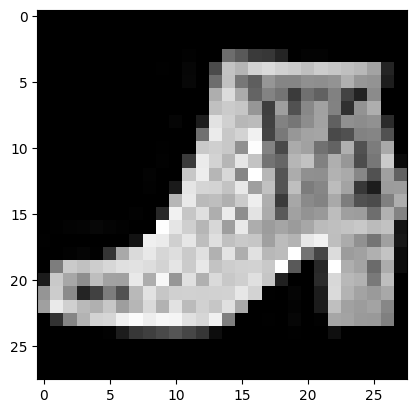

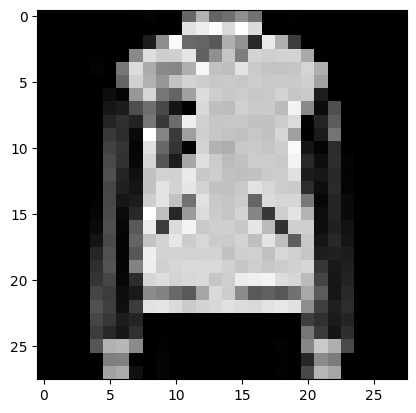

In [ ]:
for i in range(4):
  random_index = random.randint(0, len(train_images))

  plt.imshow(train_images[random_index].reshape(28, 28), cmap='gray')
  plt.show()

In [ ]:
import numpy as np

# NEGATIVE OF THE IMAGES

In [ ]:
def digital_negative(img):
  img = np.array(img)
  neg = 255 - img
  return neg

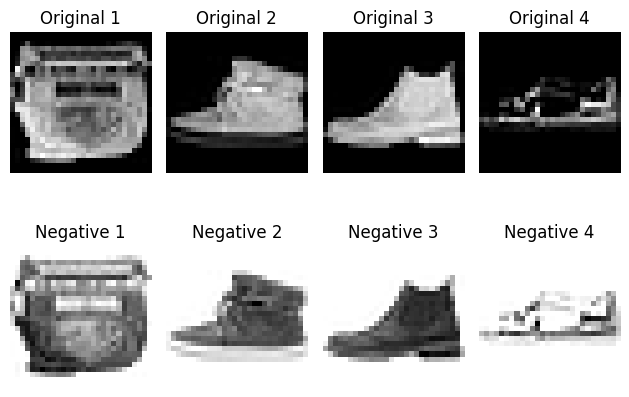

In [ ]:
for i in range(4):
    random_index = random.randint(0, len(train_images) - 1)
    original_img = train_images[random_index].reshape(28, 28)

    negative_img = digital_negative(original_img)


    plt.subplot(2, 4, i + 1)
    plt.imshow(original_img, cmap='gray')
    plt.title(f'Original {i+1}')
    plt.axis('off')

    plt.subplot(2, 4, i + 5)
    plt.imshow(negative_img, cmap='gray')
    plt.title(f'Negative {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# DIFFERENT THRESHOLDS OF THE IMAGES

In [ ]:

def thresholding(img, thresholds):
    thresholded_images = []
    for a, b in thresholds:
        neg = []
        for i in range(len(img)):
            temp = []
            for j in range(len(img[i])):
                pixel_value = img[i][j]
                if isinstance(pixel_value, np.ndarray):
                    pixel_value = pixel_value.mean()
                if a <= pixel_value <= b:
                    s = pixel_value
                else:
                    s = 0
                temp.append(s)
            neg.append(temp)
        thresholded_images.append(np.array(neg))
    return thresholded_images


In [ ]:
thresholds = [(50, 100), (100, 150), (150, 200), (200,250)]

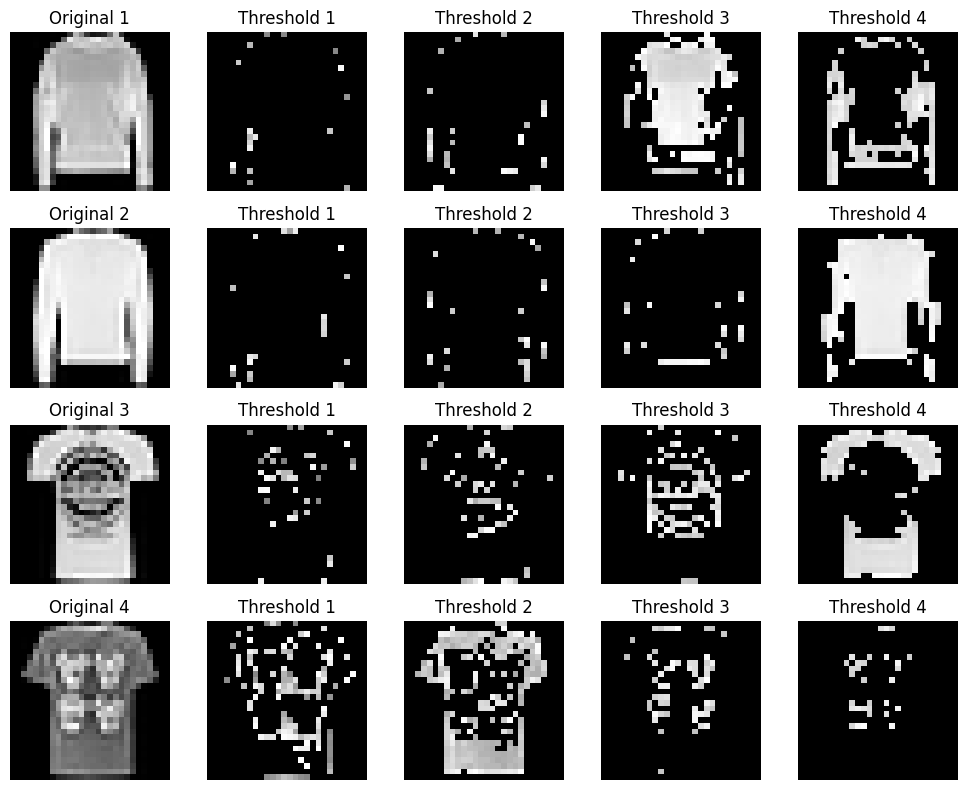

In [ ]:

plt.figure(figsize=(10, 8))
for i in range(4):
    random_index = random.randint(0, len(train_images) - 1)
    original_img = train_images[random_index]
    thresholded_images = thresholding(original_img, thresholds)

    plt.subplot(4, len(thresholds) + 1, i * (len(thresholds) + 1) + 1)
    plt.imshow(original_img, cmap='gray')
    plt.title(f'Original {i+1}')
    plt.axis('off')

    for j, threshold_img in enumerate(thresholded_images):
        plt.subplot(4, len(thresholds) + 1, i * (len(thresholds) + 1) + j + 2)
        plt.imshow(threshold_img, cmap='gray')
        plt.title(f'Threshold {j+1}')
        plt.axis('off')

plt.tight_layout()
plt.show()

# GRAY SCALE LEVEL WITHOUT BACKGROUND

In [ ]:
def gls_without_bg(img, a, b):
    img = np.array(img)
    new_img = np.where((img >= a) & (img <= b), 255, 0)
    return new_img.astype(np.uint8)

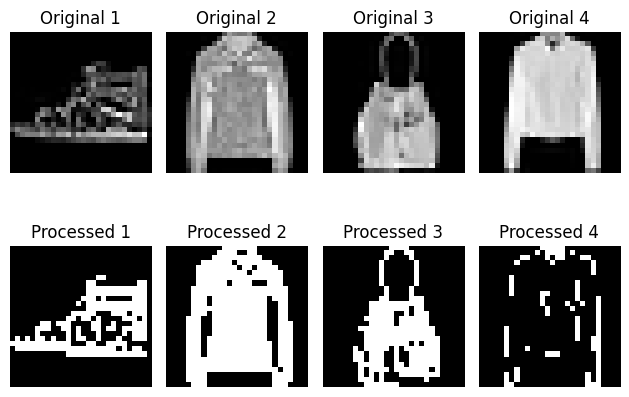

In [ ]:
for i in range(4):
    random_index = random.randint(0, len(train_images) - 1)
    original_img = train_images[random_index]
    processed_img = gls_without_bg(original_img, 50, 200)

    plt.subplot(2, 4, i + 1)
    plt.imshow(original_img, cmap='gray')
    plt.title(f'Original {i+1}')
    plt.axis('off')

    plt.subplot(2, 4, i + 5)
    plt.imshow(processed_img, cmap='gray')
    plt.title(f'Processed {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#GRAY SCALE LEVEL WITH BACKGROUND

In [ ]:
def gls_with_bg(img, a, b):
    img = np.array(img)
    new_img = np.where((img >= a) & (img <= b), img, 0)
    return new_img.astype(np.uint8)

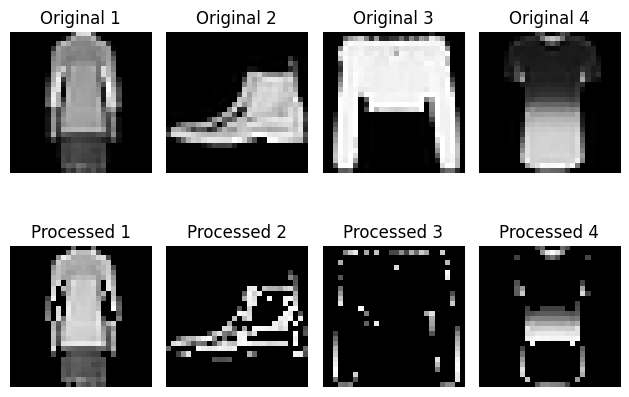

In [ ]:


import matplotlib.pyplot as plt
for i in range(4):
    random_index = random.randint(0, len(train_images) - 1)
    original_img = train_images[random_index]
    processed_img = gls_with_bg(original_img, 50, 200)

    plt.subplot(2, 4, i + 1)
    plt.imshow(original_img, cmap='gray')
    plt.title(f'Original {i+1}')
    plt.axis('off')

    plt.subplot(2, 4, i + 5)
    plt.imshow(processed_img, cmap='gray')
    plt.title(f'Processed {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


# PERFORMING THE SAME FUNCTIONS USING A PICTURE OF MY OWN

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
image = '/content/harry_final (1).jpg'


In [ ]:
imge = cv2.imread(image,1)

In [ ]:
imge.shape

(1024, 1280, 3)

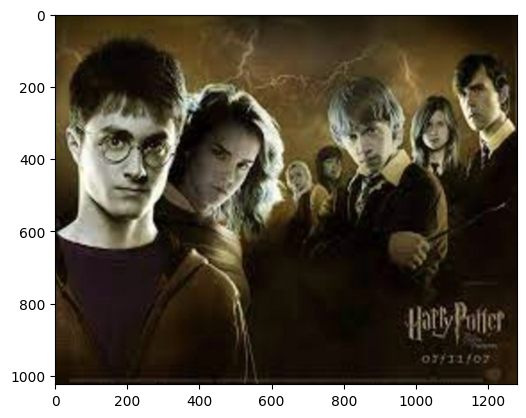

In [ ]:
plt.imshow(imge, cmap = 'gray')

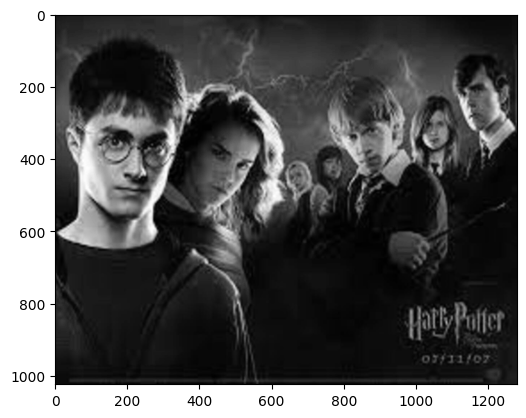

In [ ]:


import matplotlib.pyplot as plt
gray_image = cv2.cvtColor(imge, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')


In [ ]:
def digital_neg(gray_image):
  img = np.array(gray_image)
  neg = 255 - gray_image
  return neg

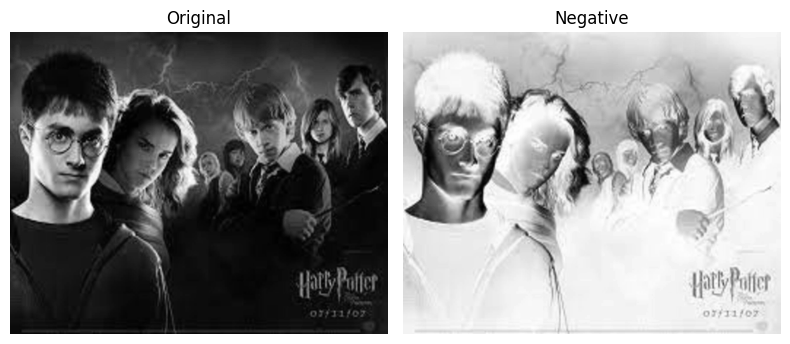

In [ ]:
neg_img = digital_neg(gray_image)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(neg_img, cmap='gray')
plt.title('Negative')
plt.axis('off')

plt.tight_layout()
plt.show()

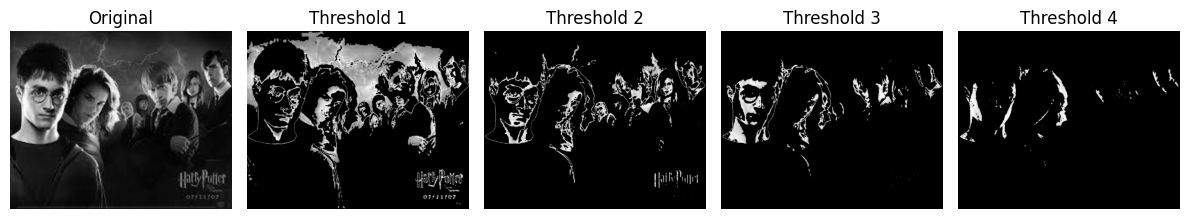

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
def thresholding(img, thresholds):
    thresholded_images = []
    for a, b in thresholds:
        neg = []
        for i in range(len(img)):
            temp = []
            for j in range(len(img[i])):
                pixel_value = img[i][j]
                if isinstance(pixel_value, np.ndarray):
                    pixel_value = pixel_value.mean()
                if a <= pixel_value <= b:
                    s = pixel_value
                else:
                    s = 0
                temp.append(s)
            neg.append(temp)
        thresholded_images.append(np.array(neg))
    return thresholded_images

thresholds = [(50, 100), (100, 150), (150, 200), (200,250)]

plt.figure(figsize=(12, 5))

plt.subplot(2, len(thresholds) + 1, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original')
plt.axis('off')

thresholded_images = thresholding(gray_image, thresholds)
for i, threshold_img in enumerate(thresholded_images):
    plt.subplot(2, len(thresholds) + 1, i + 2)
    plt.imshow(threshold_img, cmap='gray')
    plt.title(f'Threshold {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


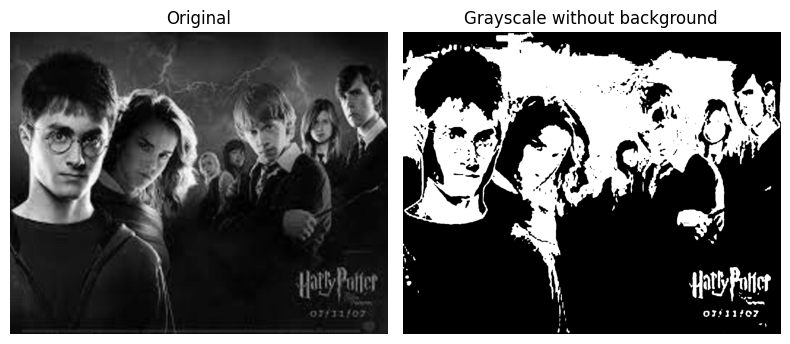

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
def gls_without_bg(img, a, b):
    img = np.array(img)
    new_img = np.where((img >= a) & (img <= b), 255, 0)
    return new_img.astype(np.uint8)

processed_img = gls_without_bg(gray_image, 50, 200)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(processed_img, cmap='gray')
plt.title('Grayscale without background')
plt.axis('off')

plt.tight_layout()
plt.show()


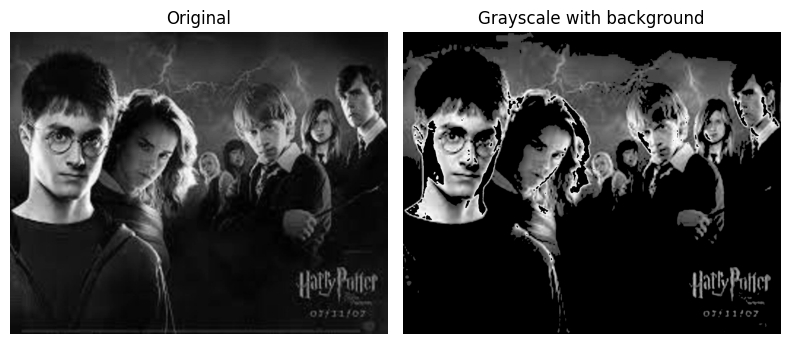

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
def gls_with_bg(img, a, b):
    img = np.array(img)
    new_img = np.where((img >= a) & (img <= b), img, 0)
    return new_img.astype(np.uint8)

processed_img_with_bg = gls_with_bg(gray_image, 50, 200)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(processed_img_with_bg, cmap='gray')
plt.title('Grayscale with background')
plt.axis('off')

plt.tight_layout()
plt.show()


## Summary

The experiment involves three key image processing techniques:

1. **Negative of an Image:** This process inverts the pixel values of an image, transforming bright areas into dark areas and vice versa. It's widely used in fields such as medical imaging, photography, and artistic applications to bring out details that may not be visible in the original image.

2. **Gray-Level Slicing:**
   - **Without Background:** Enhances specific pixel intensity ranges by setting them to a maximum value while all other intensities are minimized. This technique isolates and emphasizes particular features in the image, making it useful in applications like medical imaging and satellite imagery.
   - **With Background:** Similar to gray-level slicing without background, but it retains the background context. This approach is valuable when the surrounding information is important, such as in industrial inspections or medical diagnostics.

3. **Thresholding:** Converts grayscale images into binary images by applying a threshold. Pixels above the threshold are set to a maximum value, and those below are set to a minimum value. This technique is often used in object detection, medical imaging, and quality control to separate areas of interest from the background.


## Application

1. **Negative of an Image:**
   - **Medical Imaging:** Enhances visibility of structures in X-rays or MRI scans, aiding in the detection of abnormalities.
   - **Artistic Effects:** Used in photography and design to create visually striking effects by inverting colors.

2. **Gray-Level Slicing:**
   - **Without Background:**
     - **Medical Imaging:** Highlights specific tissues or anomalies by isolating certain intensity ranges.
     - **Satellite Imagery:** Enhances specific land features, such as water bodies or vegetation, for better analysis.
   - **With Background:**
     - **Industrial Inspection:** Retains context while highlighting defects or specific features in products.
     - **Medical Diagnostics:** Emphasizes areas of interest without losing surrounding anatomical details.

3. **Thresholding:**
   - **Object Detection:** Segments objects from the background for further analysis in computer vision applications.
   - **Quality Control:** Used in manufacturing to detect defects or inconsistencies in products automatically.
   - **Medical Imaging:** Differentiates between tissues or anomalies, aiding in diagnosis.



## Conclusion

The experiment demonstrates the effectiveness of image processing techniques such as image negative, gray-level slicing, and thresholding. Each method has specific applications in enhancing image features, segmenting images, and providing better visualization for analysis. These techniques are foundational in various fields, including medical imaging, satellite imagery, industrial inspections, and digital art, where accurate image interpretation is crucial. The visual changes in the images underscore the importance of selecting the right technique based on the desired outcome.